# Explore here

In [110]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [111]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Exploración y limpieza

In [112]:
print(" The total number of rows in the dataset is: ", total_data.shape)
print("--------------------")
total_data.info()

 The total number of rows in the dataset is:  (48895, 16)
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_revi

Conclusiones:

1) El Dataframe contiente 38821 filas (registros) y 16 columnas (Variables)
2) Analizando la información disponible, se identifica la presencia de algunos valores NaN, principalmente en las columnas last_review y reviews_per_month, que presentan la mayor cantidad de datos ausentes.

En cuanto a la clasificación de los datos:

* Características categóricas (8 en total): incluyen identificadores, nombres de anfitriones y ubicaciones, así como el tipo de habitación y la disponibilidad anual.

* Características numéricas (8 en total): abarcan coordenadas geográficas, costos, duración mínima de estadía, cantidad de reseñas y otros indicadores relacionados con la actividad de los anfitriones.

### Quitar Duplicados

In [113]:
print(f"The number of duplicated Name records is: {total_data['name'].duplicated().sum()}")
print(f"The number of duplicated Host ID records is: {total_data['host_id'].duplicated().sum()}")
print(f"The number of duplicated ID records is: {total_data['id'].duplicated().sum()}")

The number of duplicated Name records is: 989
The number of duplicated Host ID records is: 11438
The number of duplicated ID records is: 0


### Eliminar información irrelevante

In [114]:
total_data.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
total_data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


## Análisis de variables Univariadas

### Varbiables categóricas

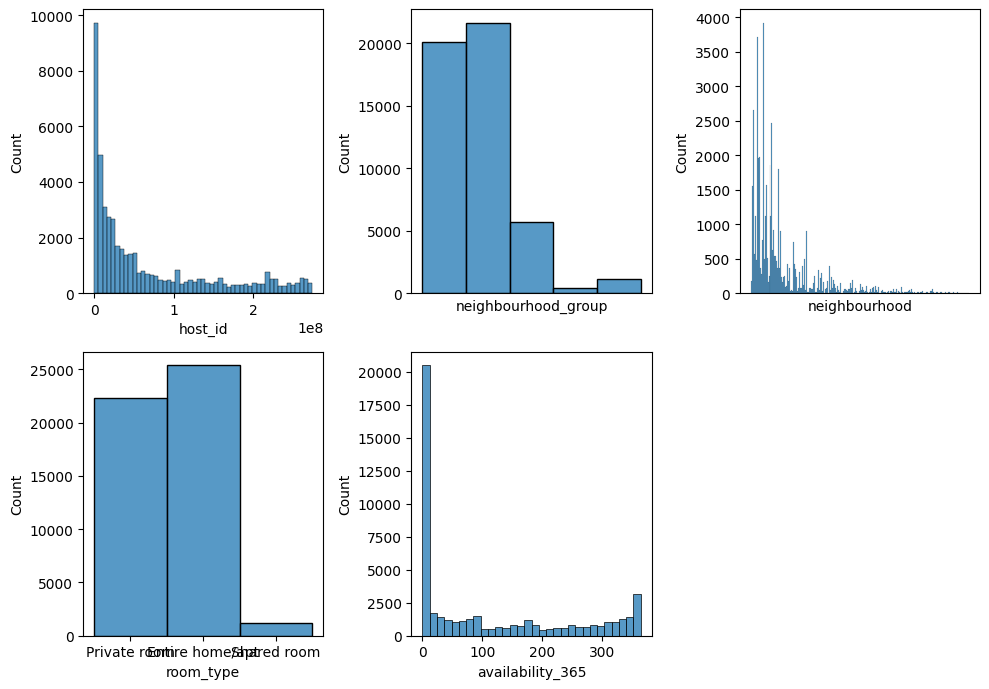

In [115]:
fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Crear histograma
sns.histplot(ax = axis[0,0], data = total_data, x = "host_id")
sns.histplot(ax = axis[0,1], data = total_data, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,2], data = total_data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = total_data, x = "room_type")
sns.histplot(ax = axis[1,1], data = total_data, x = "availability_365")
fig.delaxes(axis[1, 2])

# Ajustar y mostrar gráficos
plt.tight_layout()
plt.show()

Conclusiones:

A partir del análisis gráfico, se pueden extraer las siguientes conclusiones:

* Existen múltiples anfitriones que ofrecen varias habitaciones en alquiler. Sin embargo, se observa una cantidad significativa de valores NaN en la columna host_id.

* El conjunto de datos abarca únicamente las cinco áreas principales de Nueva York: Brooklyn, Manhattan, Queens, Staten Island y el Bronx, lo que confirma que el análisis se centra exclusivamente en esta ciudad.

* Algunos barrios tienen una mayor concentración de ofertas de Airbnb en comparación con otros.

* Los alojamientos más comunes son casas/apartamentos enteros, seguidos por habitaciones privadas, mientras que las habitaciones compartidas son la opción menos disponible.

* La mayoría de las habitaciones están disponibles los 365 días del año, pero se observan numerosos valores 0 o NaN, lo que sugiere errores o datos incompletos en esta categoría.

### Variables Numéricas

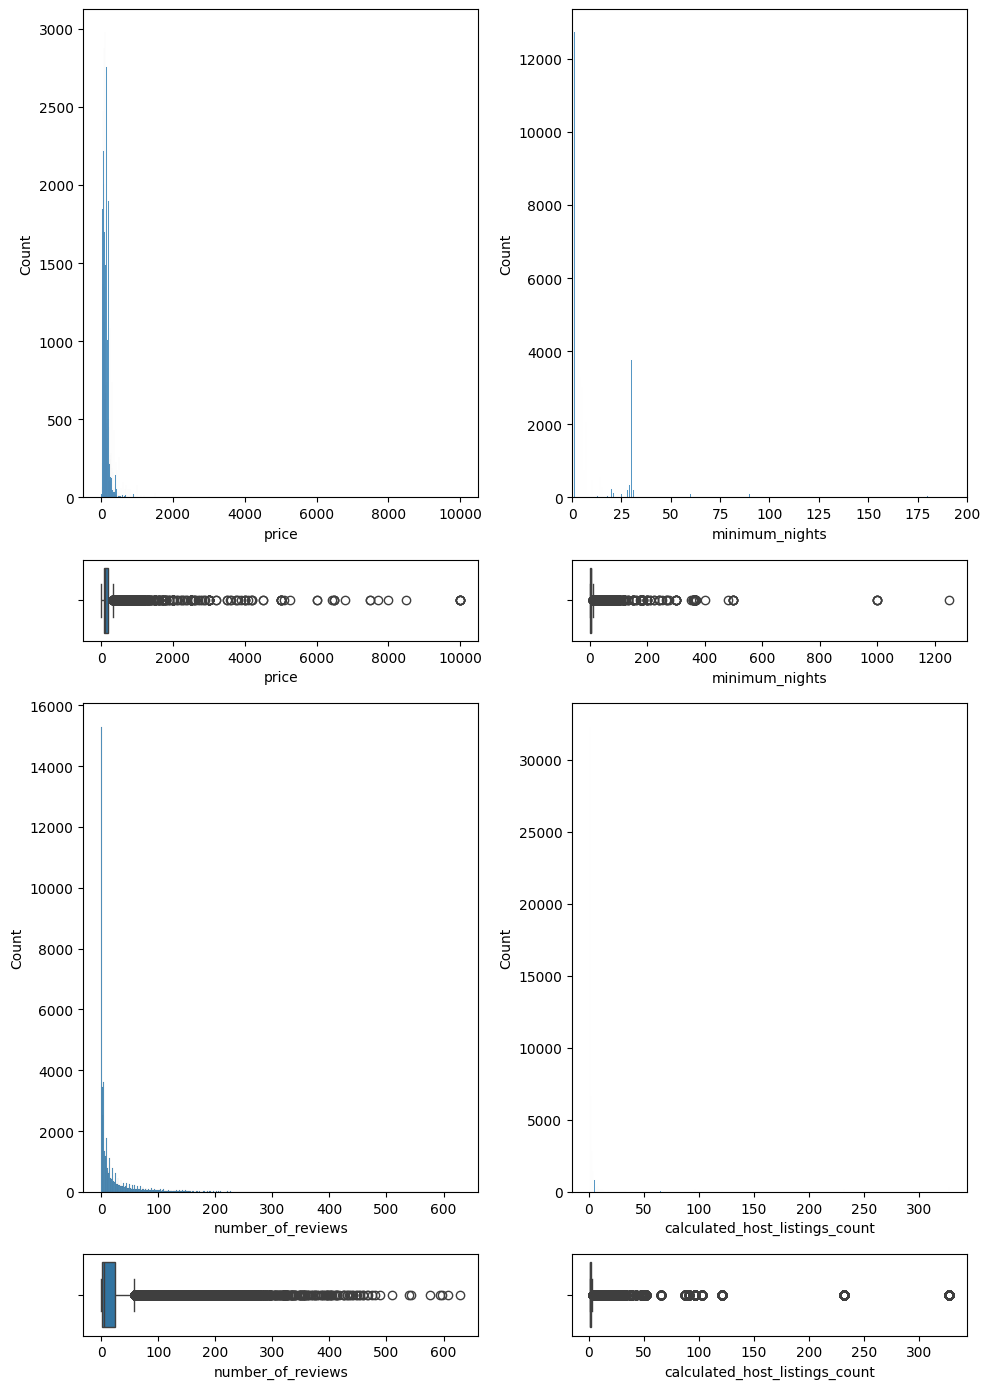

In [116]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = total_data, x = "price")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")

sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = total_data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = total_data, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "calculated_host_listings_count")

plt.tight_layout()
plt.show()

Conclusiones:

1) price: La mayoría de las propiedades tienen precios bajos, pero algunos valores extremos indican propiedades de lujo o muy exclusivas.

2) minimum_nights: La mayoría de las propiedades tienen requisitos bajos de noches mínimas, lo que las hace atractivas para turistas que buscan estancias cortas, aunque algunas propiedades requieren un mínimo alto de noches.

3) number_of_reviews: La mayoría de las propiedades tienen pocas reseñas, pero algunas propiedades populares tienen un gran número de reseñas, lo que refleja su alta demanda.

4) calculated_host_listings_count: La mayoría de los anfitriones gestionan solo una propiedad, pero algunos anfitriones tienen muchas propiedades, lo que sugiere una operación más comercial.


## Análisis de variables multivariante

### Numérico-numérico

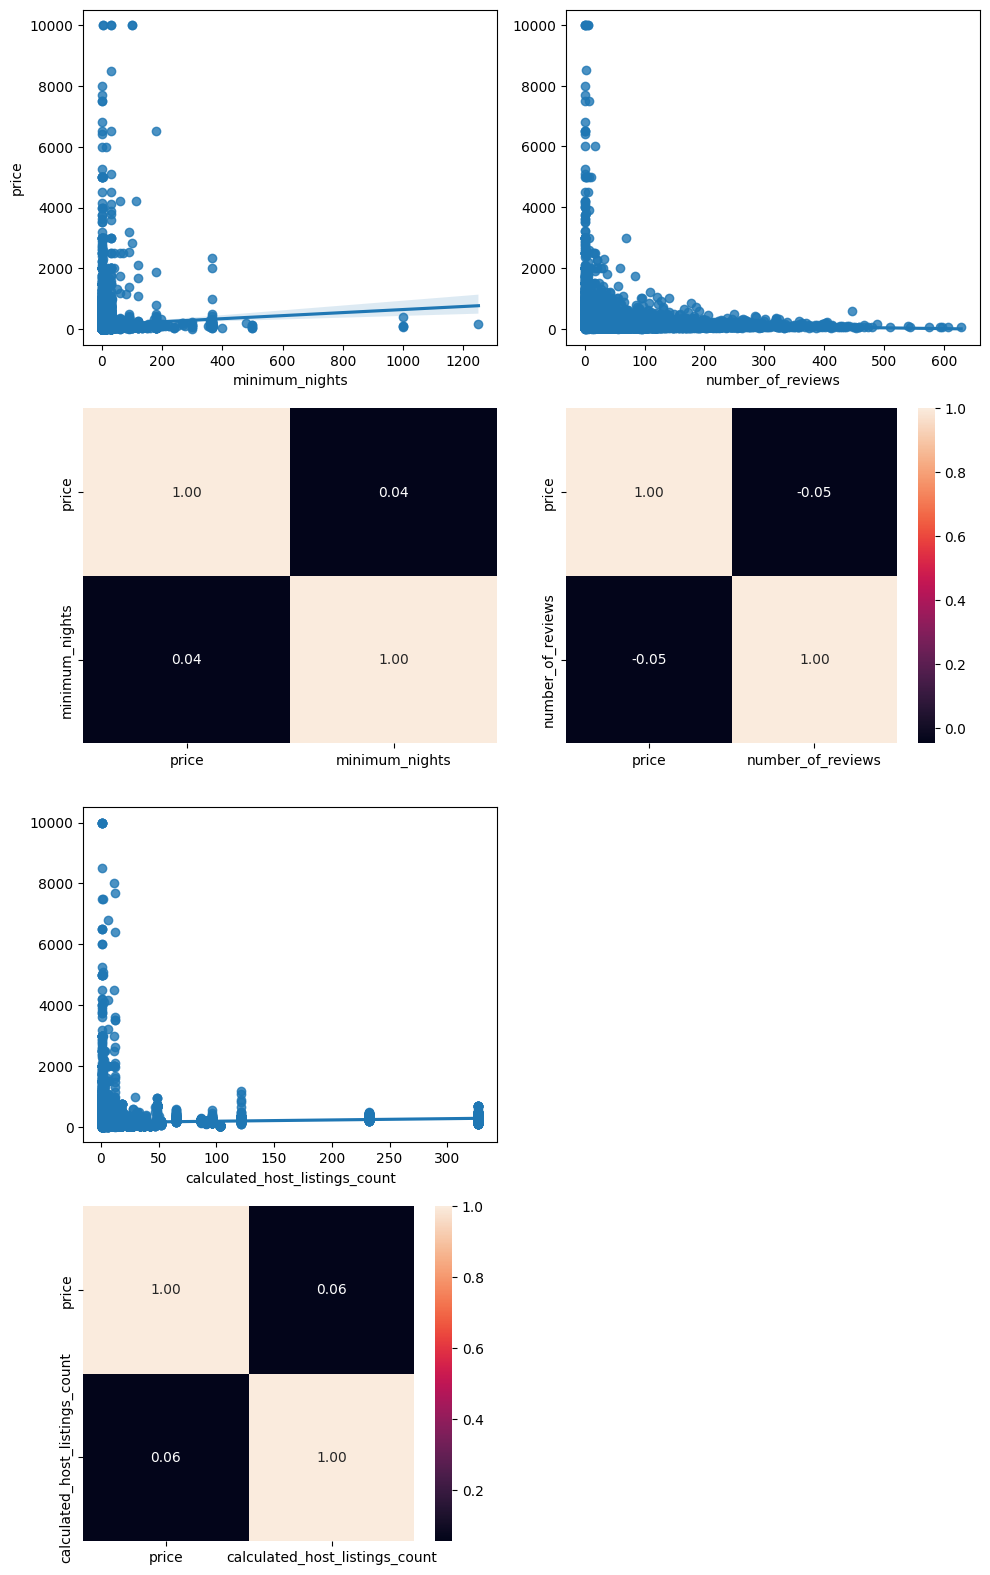

In [117]:
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()
plt.show()

Conclusiones:

A partir de los valores de correlación, observamos que:

* El precio y el número mínimo de noches no tienen relación significativa.
* El número de reseñas y el precio tampoco muestran una correlación clara.

### Categótico-categórico

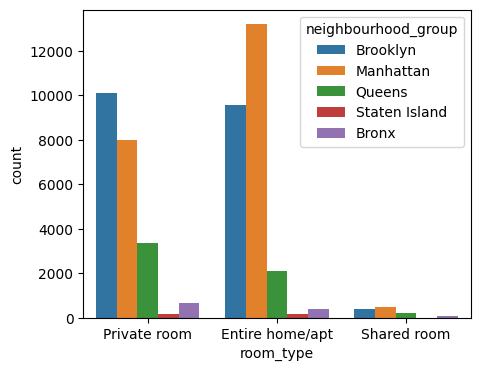

In [118]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = total_data, x = "room_type", hue = "neighbourhood_group")
plt.show()

Conclusiones:

* Manhattan tiene la mayor cantidad de alojamientos y la mayor oferta de casas/apartamentos completos.

* Brooklyn, en segundo lugar, cuenta con más habitaciones privadas, lo que sugiere que más personas comparten su hogar o buscan optimizar el espacio.

* Queens y el Bronx siguen la misma tendencia que Brooklyn.

* Staten Island tiene muy poca presencia en Airbnb.

* No hay una relación fuerte entre el tipo de habitación y el barrio, más allá de estas tendencias generales.

### Combinaciones de la clase con varias predictoras

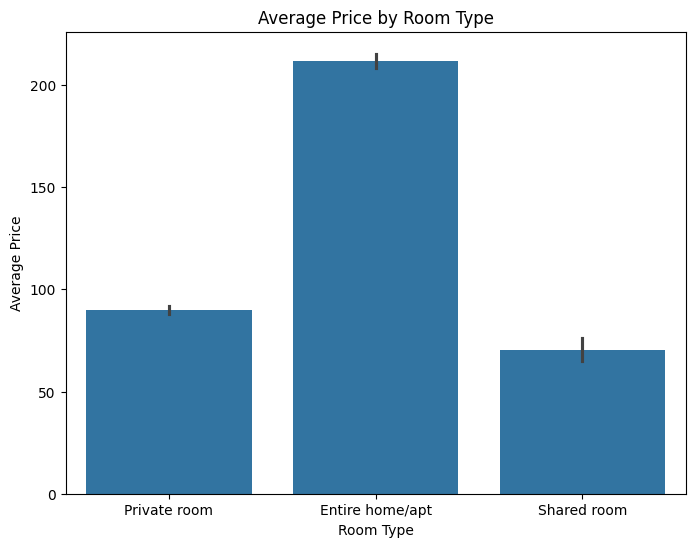

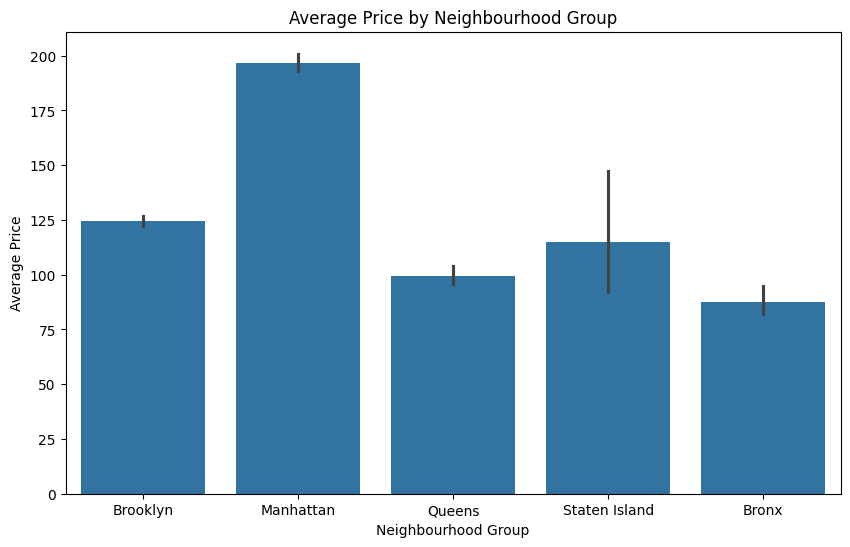

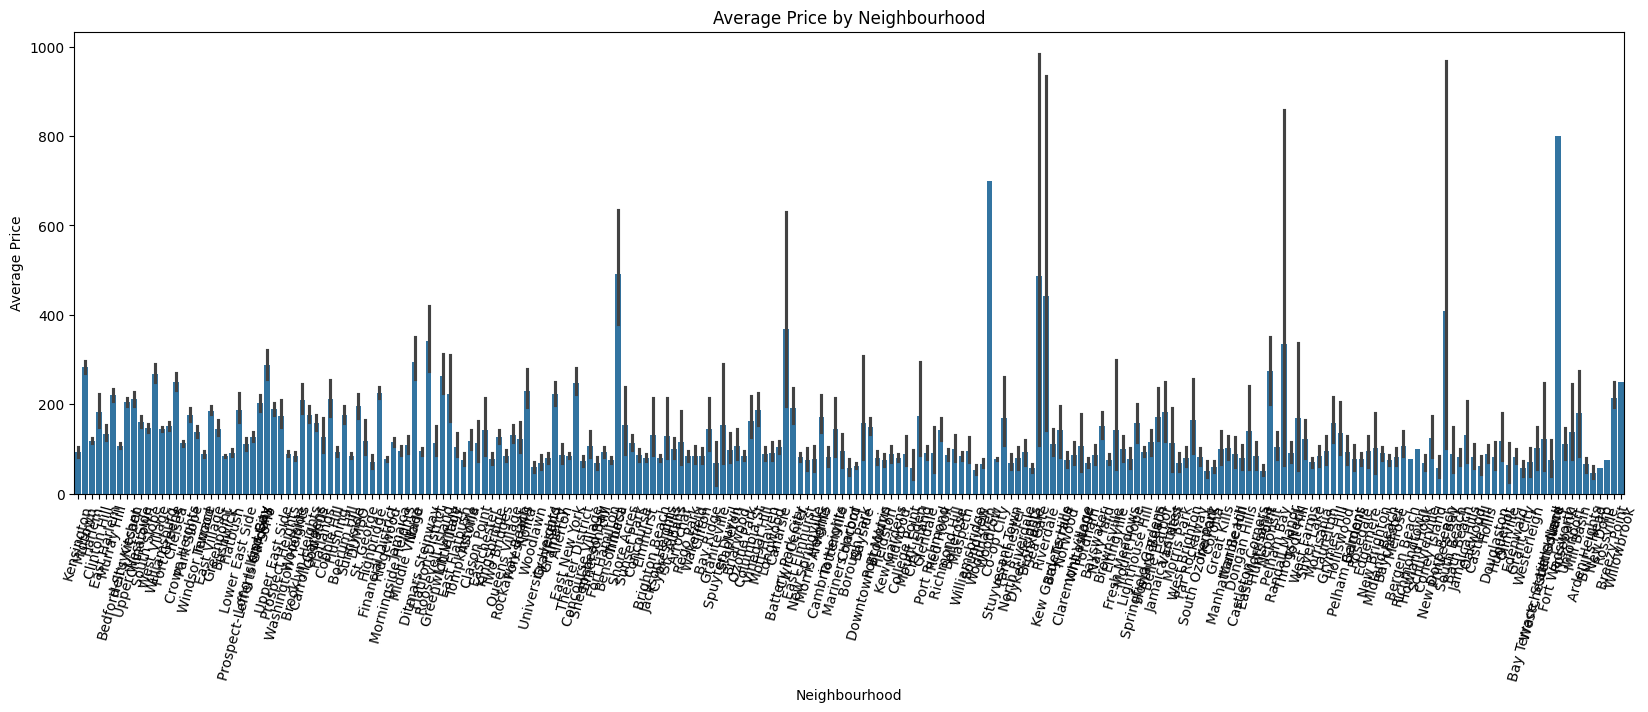

In [119]:
# Gráfico de barras para la relación entre 'room_type' y 'price'
plt.figure(figsize=(8, 6))
sns.barplot(x='room_type', y='price', data=total_data)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

# Gráfico de barras para la relación entre 'neighbourhood_group' y 'price'
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='price', data=total_data)
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.show()

# Gráfico de barras para la relación entre 'neighbourhood' y 'price'
plt.figure(figsize=(20, 6))
sns.barplot(x='neighbourhood', y='price', data=total_data)
plt.title('Average Price by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation=75)
plt.show()


Conclusiones basadas en los gráficos:

1) room_type y price:
	* Las propiedades completas (Entire home/apt) son las más caras debido a su tamaño y privacidad.
	* Las habitaciones privadas (Private room) tienen precios intermedios.
	* Las habitaciones compartidas (Shared room) son las más baratas debido a la falta de privacidad.

Conclusión: El tipo de habitación impacta significativamente el precio. Las propiedades completas son mucho más caras.

2) neighbourhood_group y price:
	* Manhattan tiene los precios más altos, seguido por Brooklyn y Queens.
	* Staten Island tiene precios más bajos debido a su lejanía de zonas turísticas.

Conclusión: La ubicación es clave. Zonas más centrales (Manhattan) tienen precios más altos, mientras que las periféricas (Staten Island) son más económicas.

3) neighbourhood y price:
	* Zonas centrales y turísticas (como Manhattan, Brooklyn, Central Park): Los precios en estos barrios son generalmente más altos debido a la alta demanda y la proximidad a los puntos turísticos y comerciales.
	* Barrios más alejados o residenciales (como Jamaica, East Village): Los precios son más bajos, ya que la demanda de alojamiento no es tan alta en comparación con las áreas centrales.

Conclusión: Los precios son generalmente más altos en los barrios más turísticos y céntricos, como Manhattan y Brooklyn, mientras que los barrios periféricos tienden a tener precios más bajos.

### Análisis de correlaciones

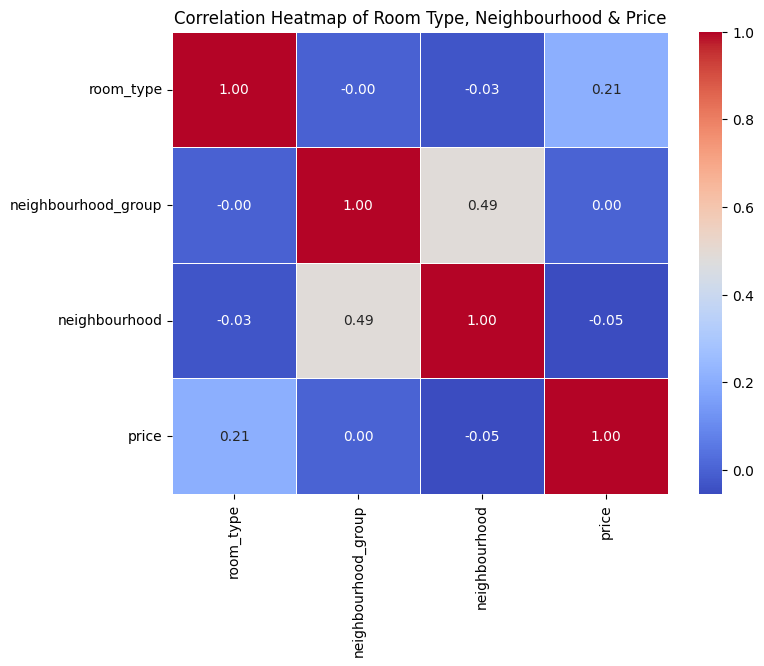

In [123]:
# Asignar valores numéricos a las columnas para usar en los gráficos

total_data["room_type"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["neighbourhood"] = pd.factorize(total_data["neighbourhood"])[0]

# Crear la matriz de correlación
corr_matrix = total_data[["room_type", "neighbourhood_group", "neighbourhood", "price"]].corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Título del gráfico
plt.title("Correlation Heatmap of Room Type, Neighbourhood & Price")

# Mostrar el gráfico
plt.show()

Conclusiones del Análisis de Correlaciones:

1.	Room Type vs. Price (0.21): Existe una correlación positiva baja entre el tipo de habitación y el precio. Esto indica que algunos tipos de habitaciones pueden tener precios más altos, pero la relación no es fuerte.

2.	Neighbourhood Group vs. Price (0.00): No hay una relación significativa entre el grupo de vecindario y el precio, lo que sugiere que el precio puede depender más de otros factores como la oferta específica en cada vecindario.

3.	Neighbourhood vs. Price (-0.05): La correlación es muy baja y negativa, lo que implica que la ubicación específica dentro de un grupo de vecindarios no tiene un impacto claro en el precio.

4.	Neighbourhood Group vs. Neighbourhood (0.49): Hay una correlación moderada entre el grupo de vecindario y el vecindario, lo cual es esperable, ya que los vecindarios pertenecen a grupos más grandes.

En general, el precio parece estar más influenciado por el tipo de habitación que por la ubicación dentro de los vecindarios.

### Categórico-numérico

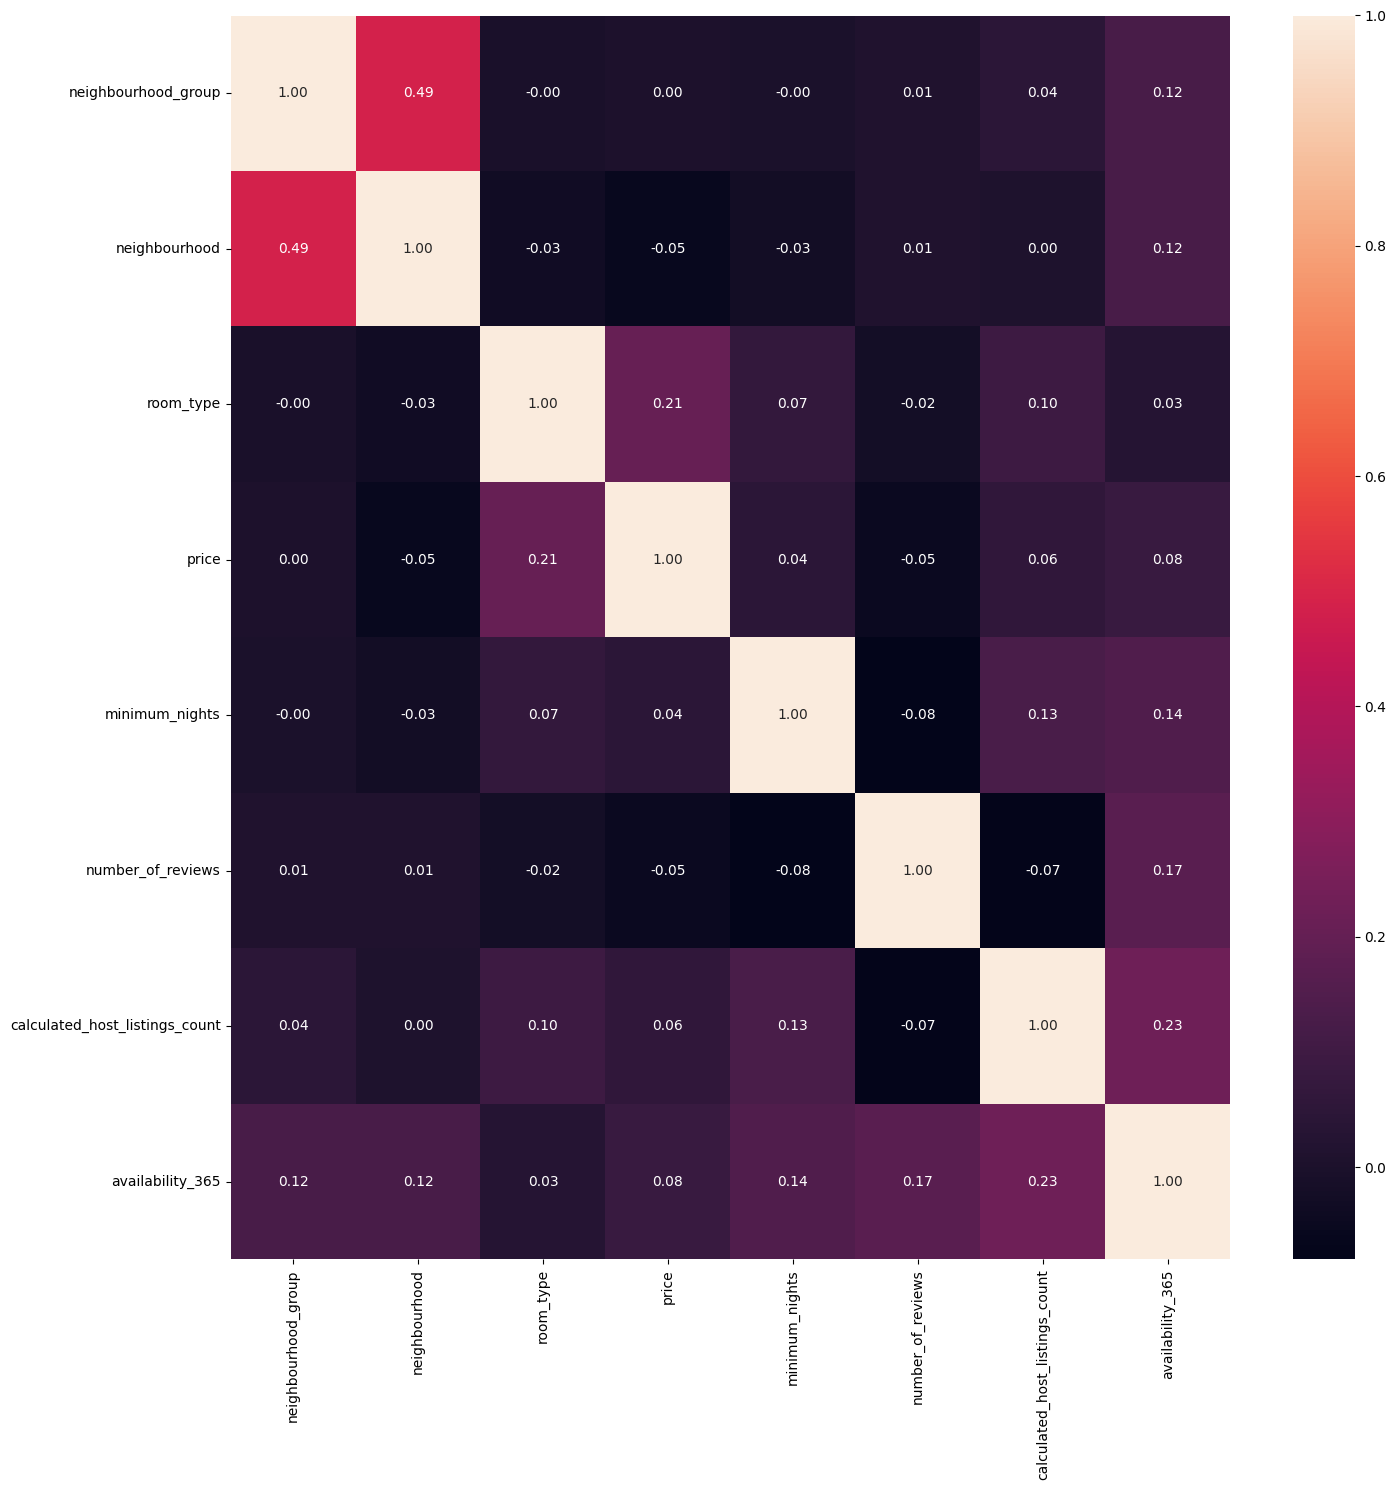

In [ ]:
total_data["room_type"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["neighbourhood"] = pd.factorize(total_data["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(total_data[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Conclusiones sobre la Correlación

* La correlación entre las variables es muy baja en general.
* Los anfitriones con más listados suelen tener mayor disponibilidad.
* Fuera de esta tendencia, no se observan relaciones claras entre las variables.

## Análisis de toda la data en una

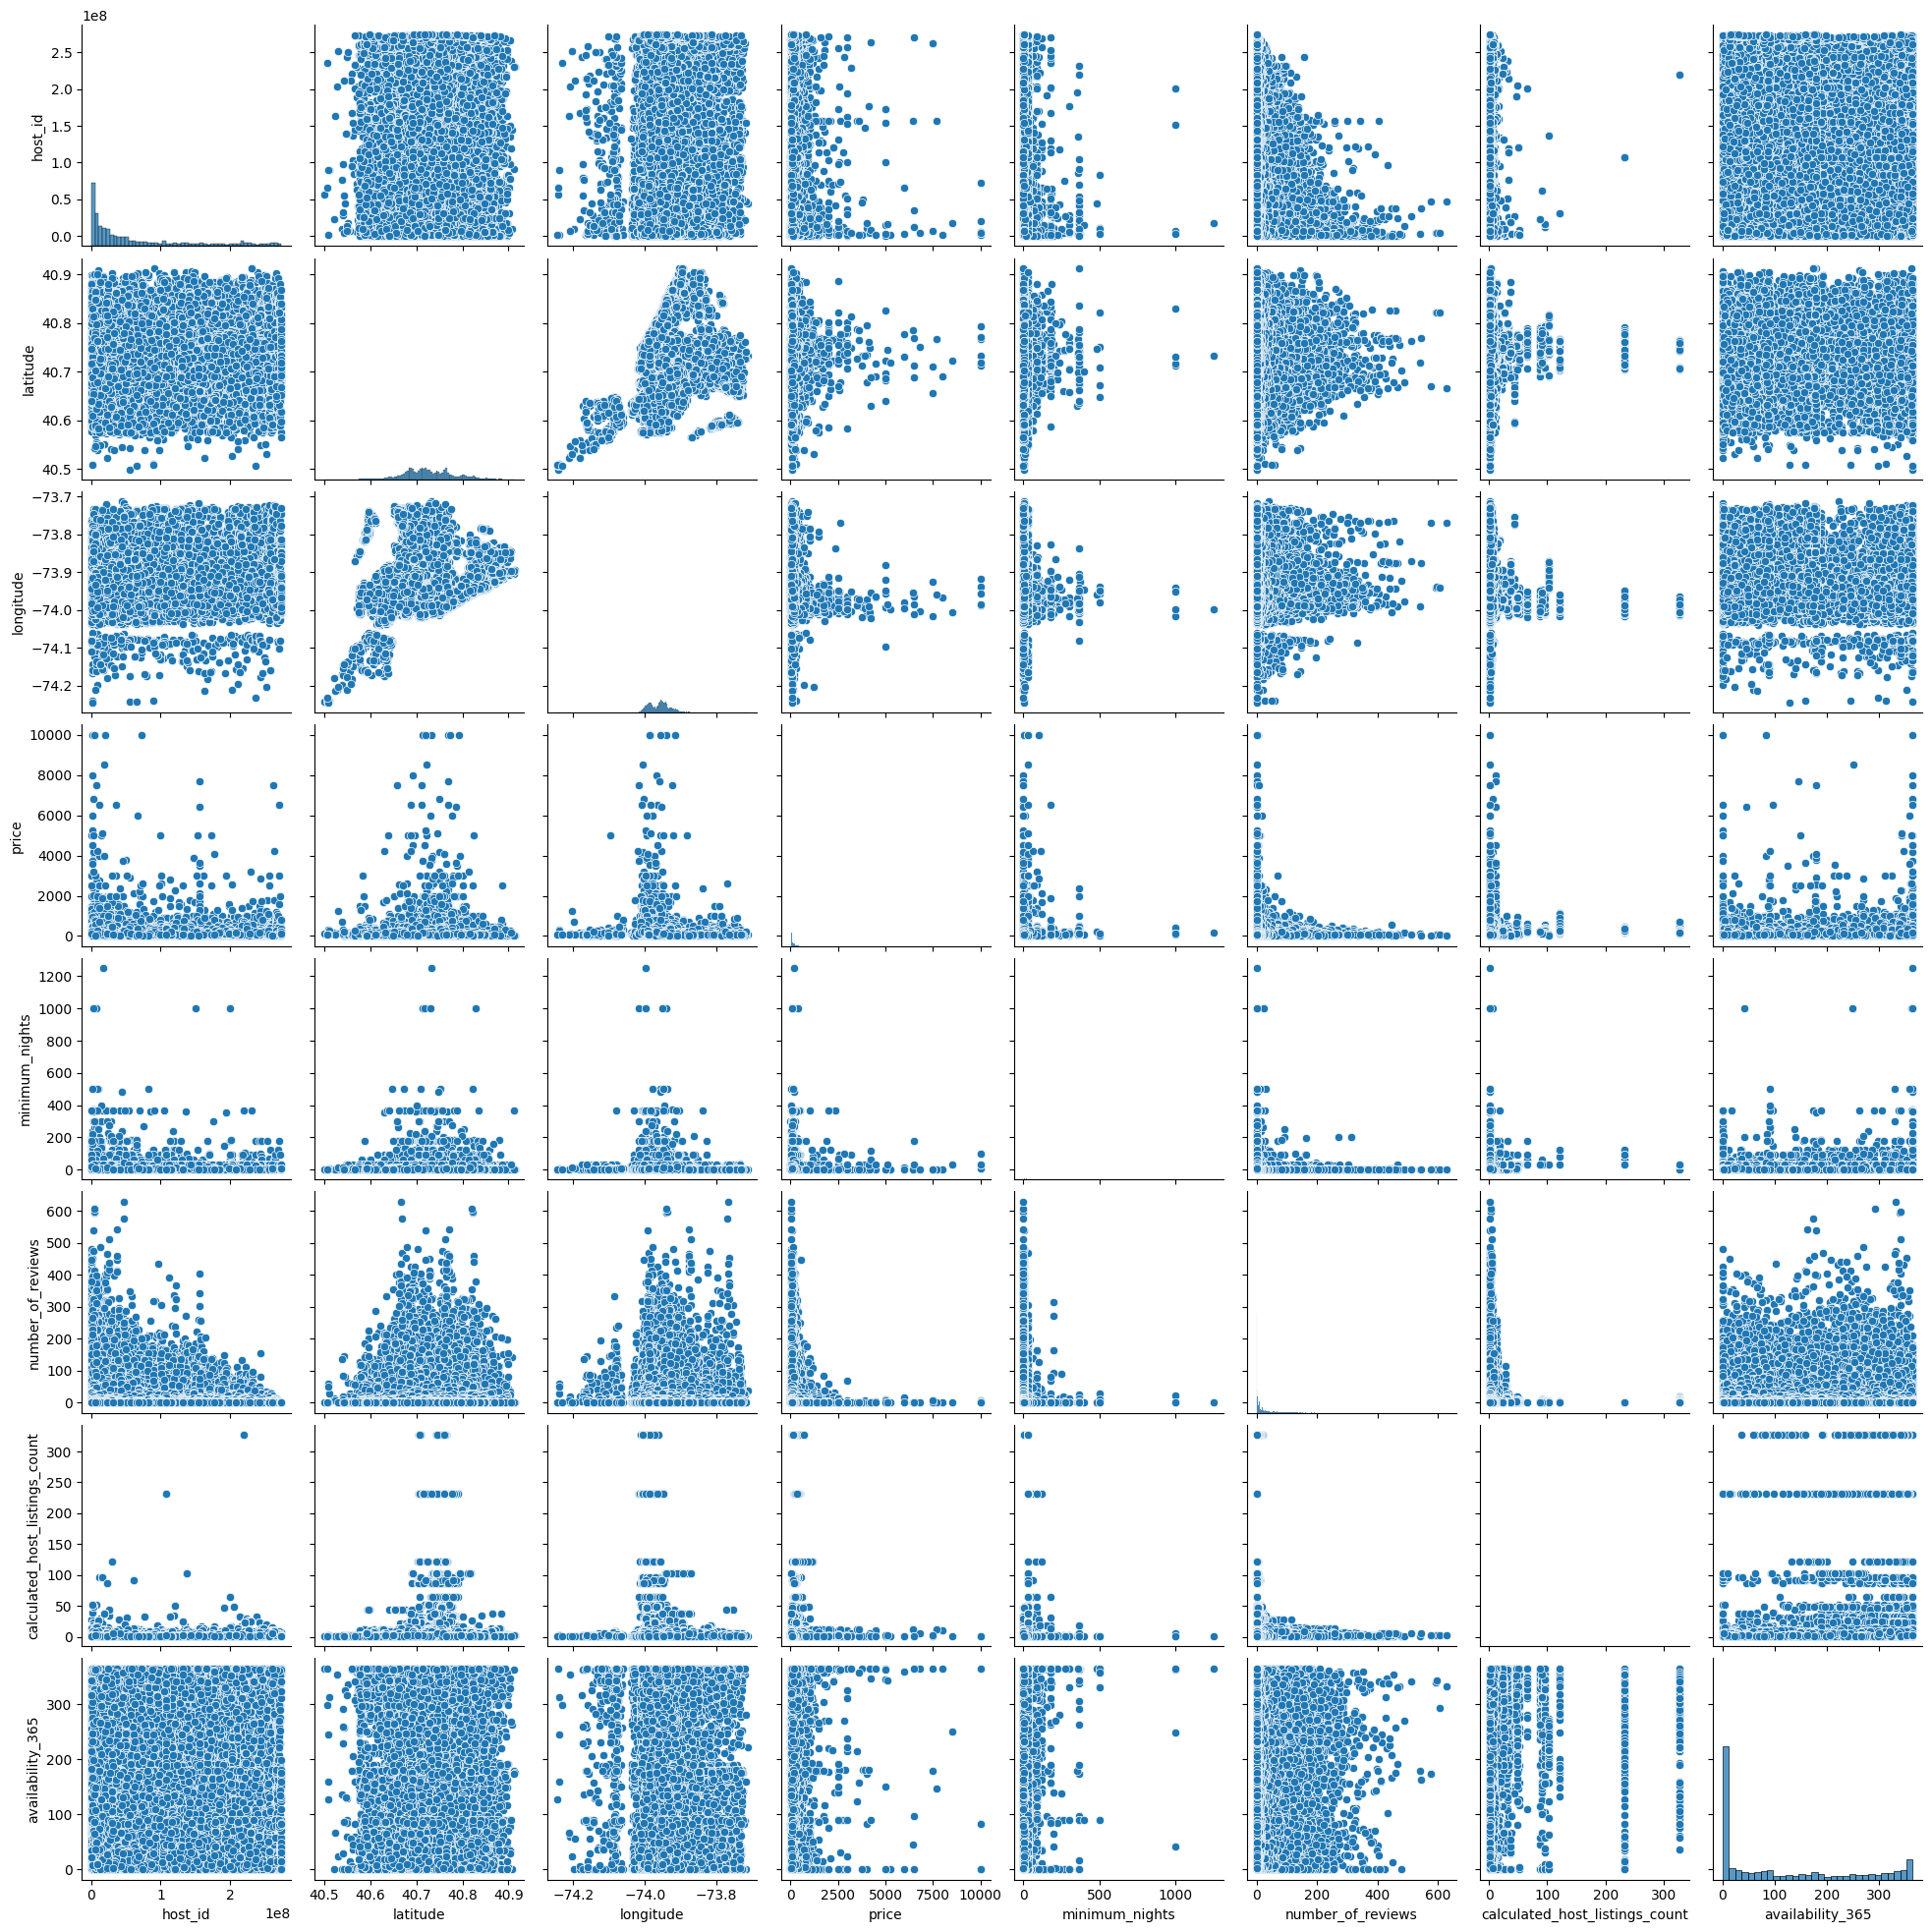

In [ ]:
sns.pairplot(data = total_data)

Culminación pt1